In [1]:
import os
import pandas as pd
from pandas import read_excel as read
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import string
# enable plots in the notebook
%matplotlib inline 

In [2]:
## Set working directory
os.chdir('../') # move dir back one 
current = os.getcwd() # get current dir
print "Moved Working directory back  %s" % current # check current dir

###################
# Widows or linx ##
###################
#path = current+'/database/sidis/expdata/ # linx
path = current+'\\database\\sidis\\expdata\\' # windows

os.chdir(path) # one dir back
# Check 
newDir = os.getcwd() # get current dir
print "Working directory for data %s" % newDir # check current dir

## Grabing list of files
data=os.listdir('./') # list all files in dir
data=[files for files in data if files.endswith('.xlsx') and not files.startswith('~')] # list of COMPASS data
print "Data files retrieved %s" % data

Moved Working directory back  E:\Laptop\School\Fa_17\Phys296\GIT\PSU-PHYS296\Python
Working directory for data E:\Laptop\School\Fa_17\Phys296\GIT\PSU-PHYS296\Python\database\sidis\expdata
Data files retrieved ['1000.xlsx', '1001.xlsx', '1002.xlsx', '1003.xlsx', '1004.xlsx', '1005.xlsx', '1006.xlsx', '1007.xlsx', '2000.xlsx', '2001.xlsx', '2002.xlsx', '2003.xlsx', '2004.xlsx', '5001.xlsx', '5002.xlsx']


In [3]:
## Reading and resructuring data

data5001 = df(read(data[-2]))

# Calculate mesurment error
data5001["delta"] = (data5001["stat_u"]**2.0+data5001["sys_u"]**2.0)**(1/2.0)

##Binning data
xBin=[0.003,0.008,0.013,0.02,0.032,0.055,0.1,0.21,0.4]
Q2Bin=[1,1.7,3,7,16,81]

data5001['xClas'] = pd.cut(data5001['x'], xBin, labels=map(chr, range(97, 97+len(xBin)-1)))
data5001['xBin'] = pd.cut(data5001['x'], xBin)

data5001['Q2Clas'] = pd.cut(data5001['Q2'], Q2Bin, labels=map(chr, range(65, 65+len(Q2Bin)-1)))
data5001['Q2Bin'] = pd.cut(data5001['Q2'], Q2Bin)

#print "x bins \n%s \n%s\n Q2 bins \n%s \n%s" \
#    %(pd.value_counts(data5001['xBin']),pd.value_counts(data5001['xClas']), \
#      pd.value_counts(data5001['Q2Bin']),pd.value_counts(data5001['Q2Clas']))

print data5001.head()

   Ebeam      x    Q2      y    z        pT   pT2        obs   value  stat_u  \
0    160  0.157  20.0  0.439  0.2  0.300000  0.09  M_Compass  6.2719  0.3126   
1    160  0.157  20.0  0.439  0.2  0.331662  0.11  M_Compass  6.2175  0.3135   
2    160  0.157  20.0  0.439  0.2  0.360555  0.13  M_Compass  5.0537  0.2711   
3    160  0.157  20.0  0.439  0.2  0.400000  0.16  M_Compass  4.8854  0.2244   
4    160  0.157  20.0  0.439  0.2  0.424264  0.18  M_Compass  4.1757  0.2275   

       ...           col       F2        yp        yh          W2     delta  \
0      ...       compass  0.64392  3.414464 -0.998970  108.268379  0.329795   
1      ...       compass  0.64392  3.414464 -0.914156  108.268379  0.330521   
2      ...       compass  0.64392  3.414464 -0.841657  108.268379  0.291452   
3      ...       compass  0.64392  3.414464 -0.749458  108.268379  0.248476   
4      ...       compass  0.64392  3.414464 -0.696253  108.268379  0.252741   

   xClas         xBin  Q2Clas         Q2Bin 

In [16]:
## Seting perameters
#xbins=a:h;Q2bins=A:E
groups=[['a','A'],['a','B'], ['b','A'], ['b','B'], ['c','A'], ['c','B'], ['c','C'], ['d','A'], ['d','B'], ['d','C'], ['e','A'],
        ['e','B'], ['e','C'], ['e','D'], ['f','B'], ['f','C'], ['f','D'], ['g','C'], ['g','D'], ['g','E'], ['h','D'], ['h','E']]
z=data5001.z.unique()
xlim,Q2lim=[0.0,0.4],[0.0,81.0]
gridmap=[32,24,33,25,34,26,18,35,27,19,36,28,20,12,29,21,13,22,14,6,15,7]  #map of ith subplots on 5x8 grid
shairYax=[6,12,18,24,32] #Subplots with y-axes ticks
shairXax=[15,22,29,32,33,34,35,36] #Subplots with x-axes ticks
Zcolor=["red","green","blue","orange"]
Zmark=["o","o","o","o"]


In [14]:
## testing
for group,grid in zip(range(len(groups)),gridmap):#zip merges >= 2 list into one interable set
    print groups[group][0]
    print groups[group][1]
    print grid
    for i in z:
        print i
#for group in range(len(groups)):
#    print groups[group][0]
#    print groups[group][1]

a
A
36
0.2
0.3
0.4
0.6
a
B
35
0.2
0.3
0.4
0.6
b
A
34
0.2
0.3
0.4
0.6
b
B
33
0.2
0.3
0.4
0.6
c
A
32
0.2
0.3
0.4
0.6
c
B
29
0.2
0.3
0.4
0.6
c
C
28
0.2
0.3
0.4
0.6
d
A
27
0.2
0.3
0.4
0.6
d
B
26
0.2
0.3
0.4
0.6
d
C
25
0.2
0.3
0.4
0.6
e
A
24
0.2
0.3
0.4
0.6
e
B
22
0.2
0.3
0.4
0.6
e
C
21
0.2
0.3
0.4
0.6
e
D
20
0.2
0.3
0.4
0.6
f
B
19
0.2
0.3
0.4
0.6
f
C
18
0.2
0.3
0.4
0.6
f
D
15
0.2
0.3
0.4
0.6
g
C
14
0.2
0.3
0.4
0.6
g
D
13
0.2
0.3
0.4
0.6
g
E
12
0.2
0.3
0.4
0.6
h
D
7
0.2
0.3
0.4
0.6
h
E
6
0.2
0.3
0.4
0.6


## Figure 1: f(values)=qT2 | g(xBin)=Q2

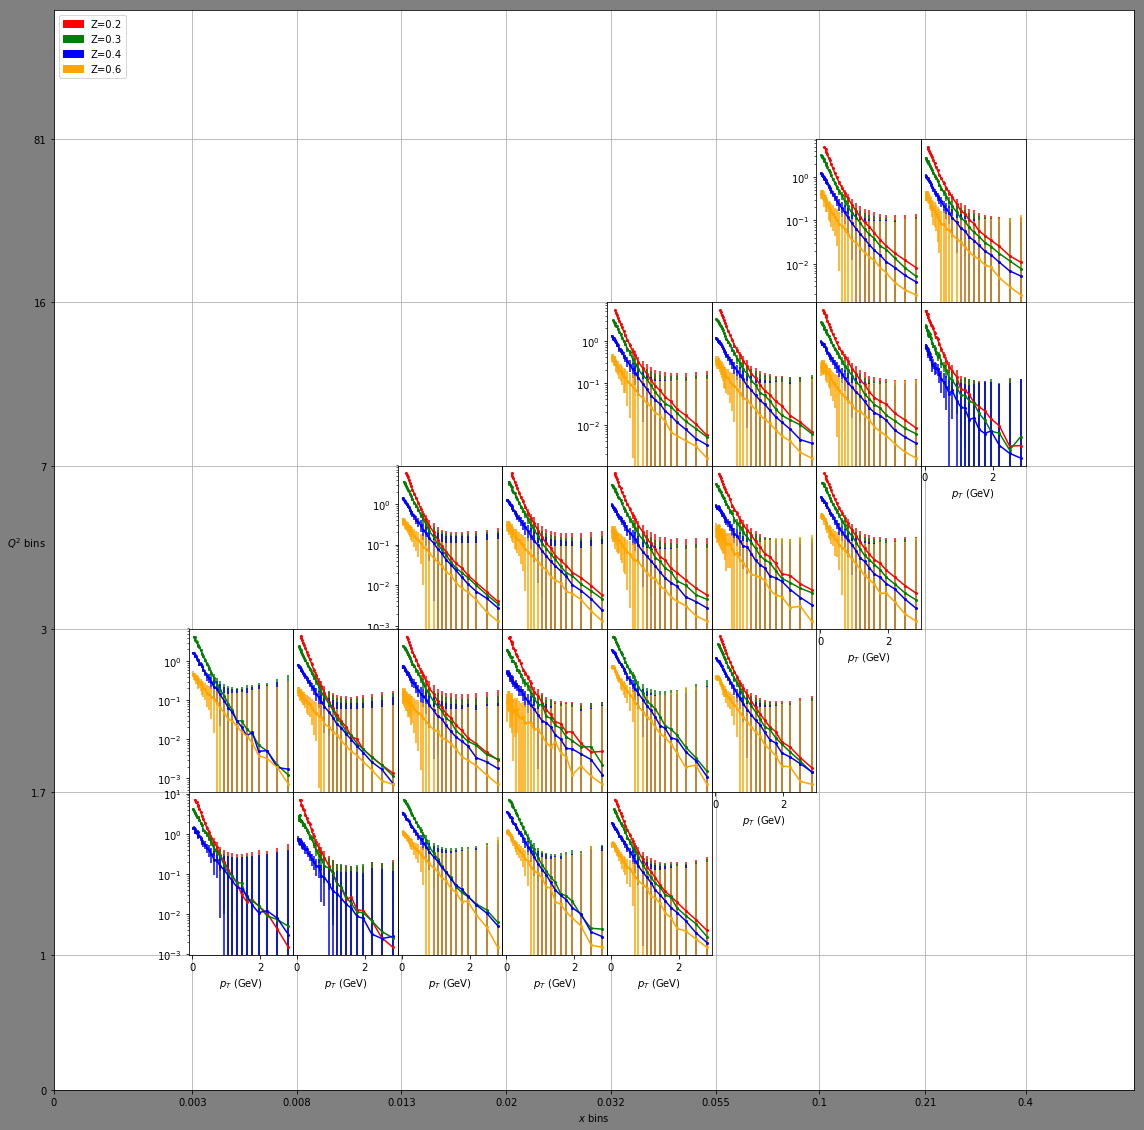

In [17]:
## Ploting
fig=plt.figure(figsize=(15, 15),facecolor="gray") # figsize=wxh in inches

globalGrid=gridspec.GridSpec(1, 1, wspace=0.0, hspace=0.0) #the axis to put subplot grid in
innerGrid=gridspec.GridSpecFromSubplotSpec(5, 8, subplot_spec=globalGrid[0], wspace=0.0, hspace=0.0) #subplot grid

# Set custom ticks
ax=fig.add_axes([0,0,1,1])
ax.yaxis.set_ticks([ 0.,0.1245,0.2755,0.427,0.57752,0.729,0.8805])
ax.xaxis.set_ticks([0,0.1285,0.2255,0.322,0.419,0.516,0.613,0.709,0.71+0.097,0.9])
ax.set_yticklabels([0]+Q2Bin)
ax.set_xticklabels([0]+xBin)

# Set title and axis labels
#ax.title("COMPASS Data")
ax.set_ylabel(r"$Q^2$ bins",rotation="horizontal")
ax.set_xlabel(r"$x$ bins")


# Set legend
Zpatch1 = mpatches.Patch(color=Zcolor[0], label='Z=0.2')
Zpatch2 = mpatches.Patch(color=Zcolor[1], label='Z=0.3')
Zpatch3 = mpatches.Patch(color=Zcolor[2], label='Z=0.4')
Zpatch4 = mpatches.Patch(color=Zcolor[3], label='Z=0.6')
ax.legend(handles=[Zpatch1,Zpatch2,Zpatch3,Zpatch4],loc='upper left')
ax.grid()

for group,grid in zip(range(len(groups)),reversed(gridmap)):
    data_bin=data5001.query('xClas=="%s" and Q2Clas=="%s"' %(groups[group][0],groups[group][1]))
    k=0 #counter
    for i in z:
        ax = fig.add_subplot(innerGrid[grid])
        ax.set_yscale("log")
        ax.errorbar(data_bin.pT2[data_bin.z==i],data_bin.value[data_bin.z==i],#x,y
                    data_bin.delta[data_bin.z==i],#errorbars
                    color=Zcolor[k],marker=Zmark[k],markersize=2)#line properties
        if grid not in shairYax:
            ax.set_yticklabels('')
        if grid not in shairXax:
            ax.set_xticklabels('')
        ax.set_xlabel(r"$p_T$ (GeV)")
        k+=1 #add one to counter



## Plot of positions only

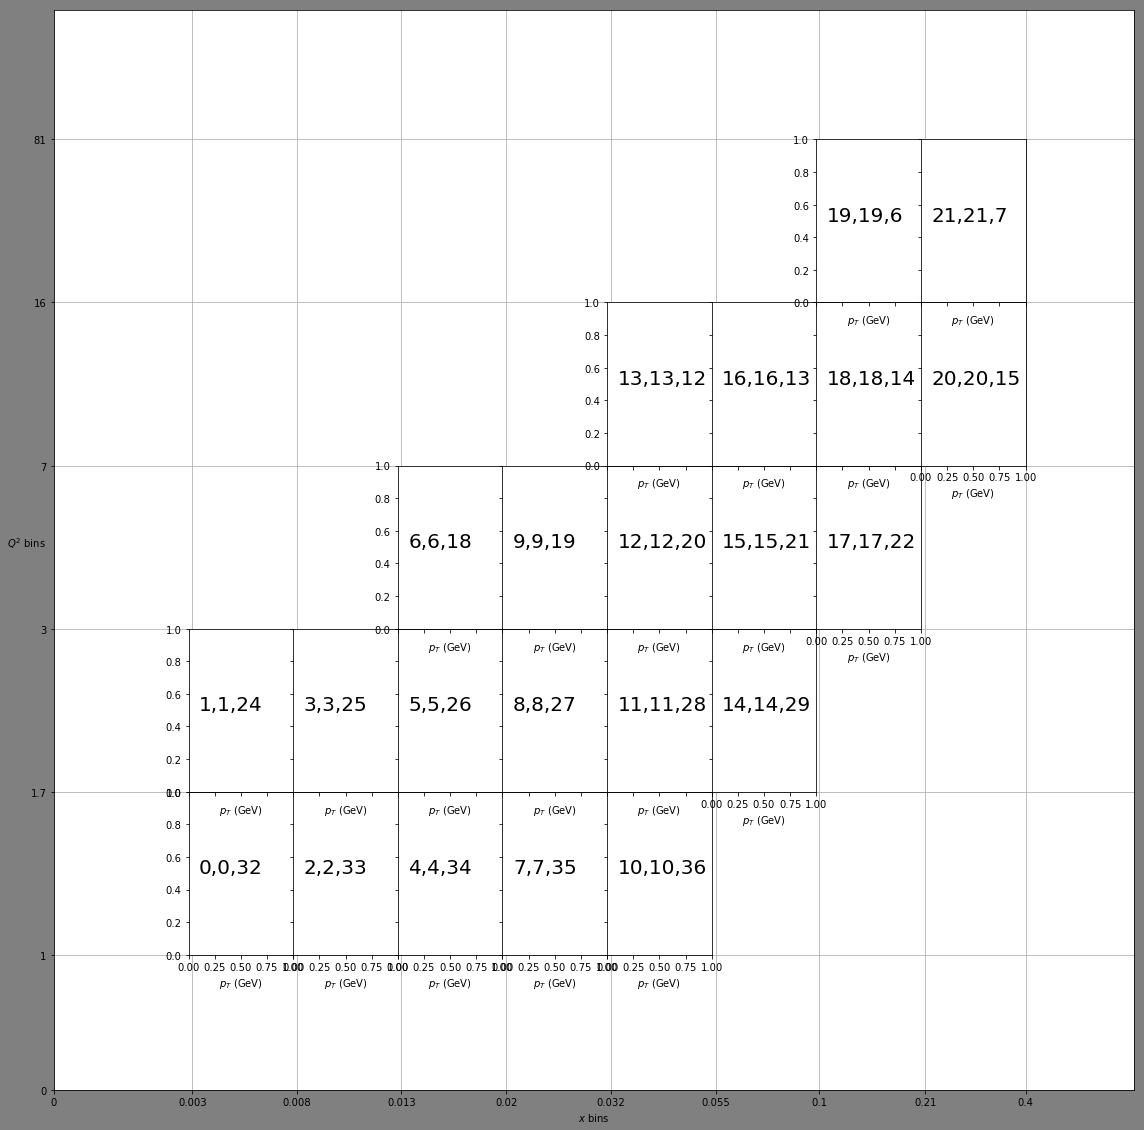

In [18]:
fig=plt.figure(figsize=(15, 15),facecolor="gray") # figsize; wxh in inches

globalGrid=gridspec.GridSpec(1, 1, wspace=0.0, hspace=0.0) # Figure for subplot matrix as 1x1 matrix:
innerGrid=gridspec.GridSpecFromSubplotSpec(5, 8, subplot_spec=globalGrid[0], wspace=0.0, hspace=0.0) # subplot grid


# Figure properties 'self's: Could be dictionary?
ax=fig.add_axes([0,0,1,1]) # axas for subplot matrix as percent of hole
ax.xaxis.set_ticks([0,0.1285,0.2255,0.322,0.419,0.516,0.613,0.709,0.71+0.097,0.9]) # xy-ticks marks / grid lines:
ax.yaxis.set_ticks([ 0.,0.1245,0.2755,0.427,0.57752,0.729,0.8805]) # guess and check method: ginput() not working for 2.7 -_-
ax.set_xticklabels([0]+xBin) # xy-tick lables 
ax.set_yticklabels([0]+Q2Bin) 
ax.set_xlabel(r"$x$ bins") # xy-lables
ax.set_ylabel(r"$Q^2$ bins",rotation="horizontal")
ax.grid() # grid on

k=0 # count
for group,grid in zip(range(len(groups)),gridmap): # zip >= 2 list as one iterable list
    ax = fig.add_subplot(innerGrid[grid]) # subplot(5,8,grid in gridmap): Note! gridmap may be ploting wrong bins in sub-space
    ax.xaxis.set_major_locator(plt.MaxNLocator(4)) # limit number of tics in x subplot ax to 4
    ax.text(0.1, 0.5, '%s,%s,%s' %(k,group,grid), fontsize=20) # plt.test(x/100,y/100,str('k','group','grid'))
    if grid not in shairXax: # if grid in gridmap not in list of shairXYax than xy-ticklables not shown
        ax.set_xticklabels('')
    if grid not in shairYax: 
        ax.set_yticklabels('')
    ax.set_xlabel(r"$p_T$ (GeV)") # xlab for subplot space
    k+=1 # add
 
        
        

In [19]:
## dictionary of subplot 
# purpous: to ensure the correct data is ploted in the correct subplot space
compas={} # Initilise dictionary for subplot data 
compasZ={} # Initilise dictionary for subplot axies
k=0 #counter
for group,grid in zip(range(len(groups)),gridmap):
    data_bin=data5001.query('xClas=="%s" and Q2Clas=="%s"' %(groups[group][0],groups[group][1]))
    compas['%s,%s,%s' %(k,group,grid)]=data_bin
    for i in z:
        compasZ['%s,%s,%s,%s' %(k,group,grid,i)]=data_bin
    k+=1 #add one to counter

<p style="font-family: Arial; font-size:2.00em;color:purple; font-style:bold">
“I have heard there are troubles of more than one kind.<br> <br>
Some come from ahead and some come from behind. <br> <br>
But I've bought a big bat. I'm all ready you see. <br> <br>
Now my troubles are going to have troubles with me!” <br> <br>
</p>
<p style="font-family: Arial; font-size:1.5em;color:blue; font-style:italic">
Author: Dr. Seuss <br> <br>
</p>


In [27]:
sub='20,20,15'

print compas[sub].xBin.unique()
print ''
print compas[sub].Q2Bin.unique()

[(0.21, 0.4]]
Categories (1, interval[float64]): [(0.21, 0.4]]

[(7.0, 16.0]]
Categories (1, interval[float64]): [(7.0, 16.0]]


In [19]:
## Subplot space
print ('k','group','grid')
print 'where,\n   k-counter for kth subplot'
print '   group-xBin as a:h  and Q2Bin as A:E \n%s \n   grid-pos of kth subplot  \n%s' %(groups,gridmap)
print ''
print 'compas dictionary keys in assending order'
print sorted(compas.keys())
print ''
print 'for Bins in compas.keys Subplot in compas - xBin as 0:8 and Q2Bin as 0:5'  

for n,m,group,Bins in zip(range(len(xBin)-1),range(len(Q2Bin)-1),range(len(groups)),sorted(compas.keys())):
    print 'compas[%s]' %(Bins)
    print '  xBin = %s = %s = %s \n on %s' %(xBin[n],groups[group][0],n,compas[Bins].xBin.unique())
    print '  Q2Bin = %s = %s =%s \n on %s' %(Q2Bin[m],groups[group][1],m,compas[Bins].Q2Bin.unique())
    

print ''
print ''
print 'XBin'
print compas['4,4,32'].xBin.unique()

('k', 'group', 'grid')
where,
   k-counter for kth subplot
   group-xBin as a:h  0:8 and Q2Bin as A:E 
[['a', 'A'], ['a', 'B'], ['b', 'A'], ['b', 'B'], ['c', 'A'], ['c', 'B'], ['c', 'C'], ['d', 'A'], ['d', 'B'], ['d', 'C'], ['e', 'A'], ['e', 'B'], ['e', 'C'], ['e', 'D'], ['f', 'B'], ['f', 'C'], ['f', 'D'], ['g', 'C'], ['g', 'D'], ['g', 'E'], ['h', 'D'], ['h', 'E']] 
   grid-pos of kth subplot  
[36, 35, 34, 33, 32, 29, 28, 27, 26, 25, 24, 22, 21, 20, 19, 18, 15, 14, 13, 12, 7, 6]

compas dictionary keys in assending order
['0,0,36', '1,1,35', '10,10,24', '11,11,22', '12,12,21', '13,13,20', '14,14,19', '15,15,18', '16,16,15', '17,17,14', '18,18,13', '19,19,12', '2,2,34', '20,20,7', '21,21,6', '3,3,33', '4,4,32', '5,5,29', '6,6,28', '7,7,27', '8,8,26', '9,9,25']

for Bins in compas.keys Subplot in compas - xBin as 0:8 and Q2Bin as 0:5
compas[0,0,36]
  xBin = 0.003 = a = 0 
 on [(0.003, 0.008]]
Categories (1, interval[float64]): [(0.003, 0.008]]
  Q2Bin = 1 = A =0 
 on [(1.0, 1.7]]
Catego

In [80]:
print data5001.Q2Bin.unique()
print ''
print data5001.xBin.unique()
print len(xBin)-1
print len(Q2Bin)-1

[(16.0, 81.0], (7.0, 16.0], (3.0, 7.0], (1.7, 3.0], (1.0, 1.7]]
Categories (5, interval[float64]): [(1.0, 1.7] < (1.7, 3.0] < (3.0, 7.0] < (7.0, 16.0] < (16.0, 81.0]]

[(0.1, 0.21], (0.21, 0.4], (0.032, 0.055], (0.055, 0.1], (0.013, 0.02], (0.02, 0.032], (0.003, 0.008], (0.008, 0.013]]
Categories (8, interval[float64]): [(0.003, 0.008] < (0.008, 0.013] < (0.013, 0.02] < (0.02, 0.032] < (0.032, 0.055] < (0.055, 0.1] < (0.1, 0.21] < (0.21, 0.4]]
8
5
